In [1]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image
from collections import Counter

In [2]:
img = cv2.imread("samples/im_1.jpg",0)
im_out = cv2.imread("samples/im_1.jpg")
img.shape

(1754, 1241)

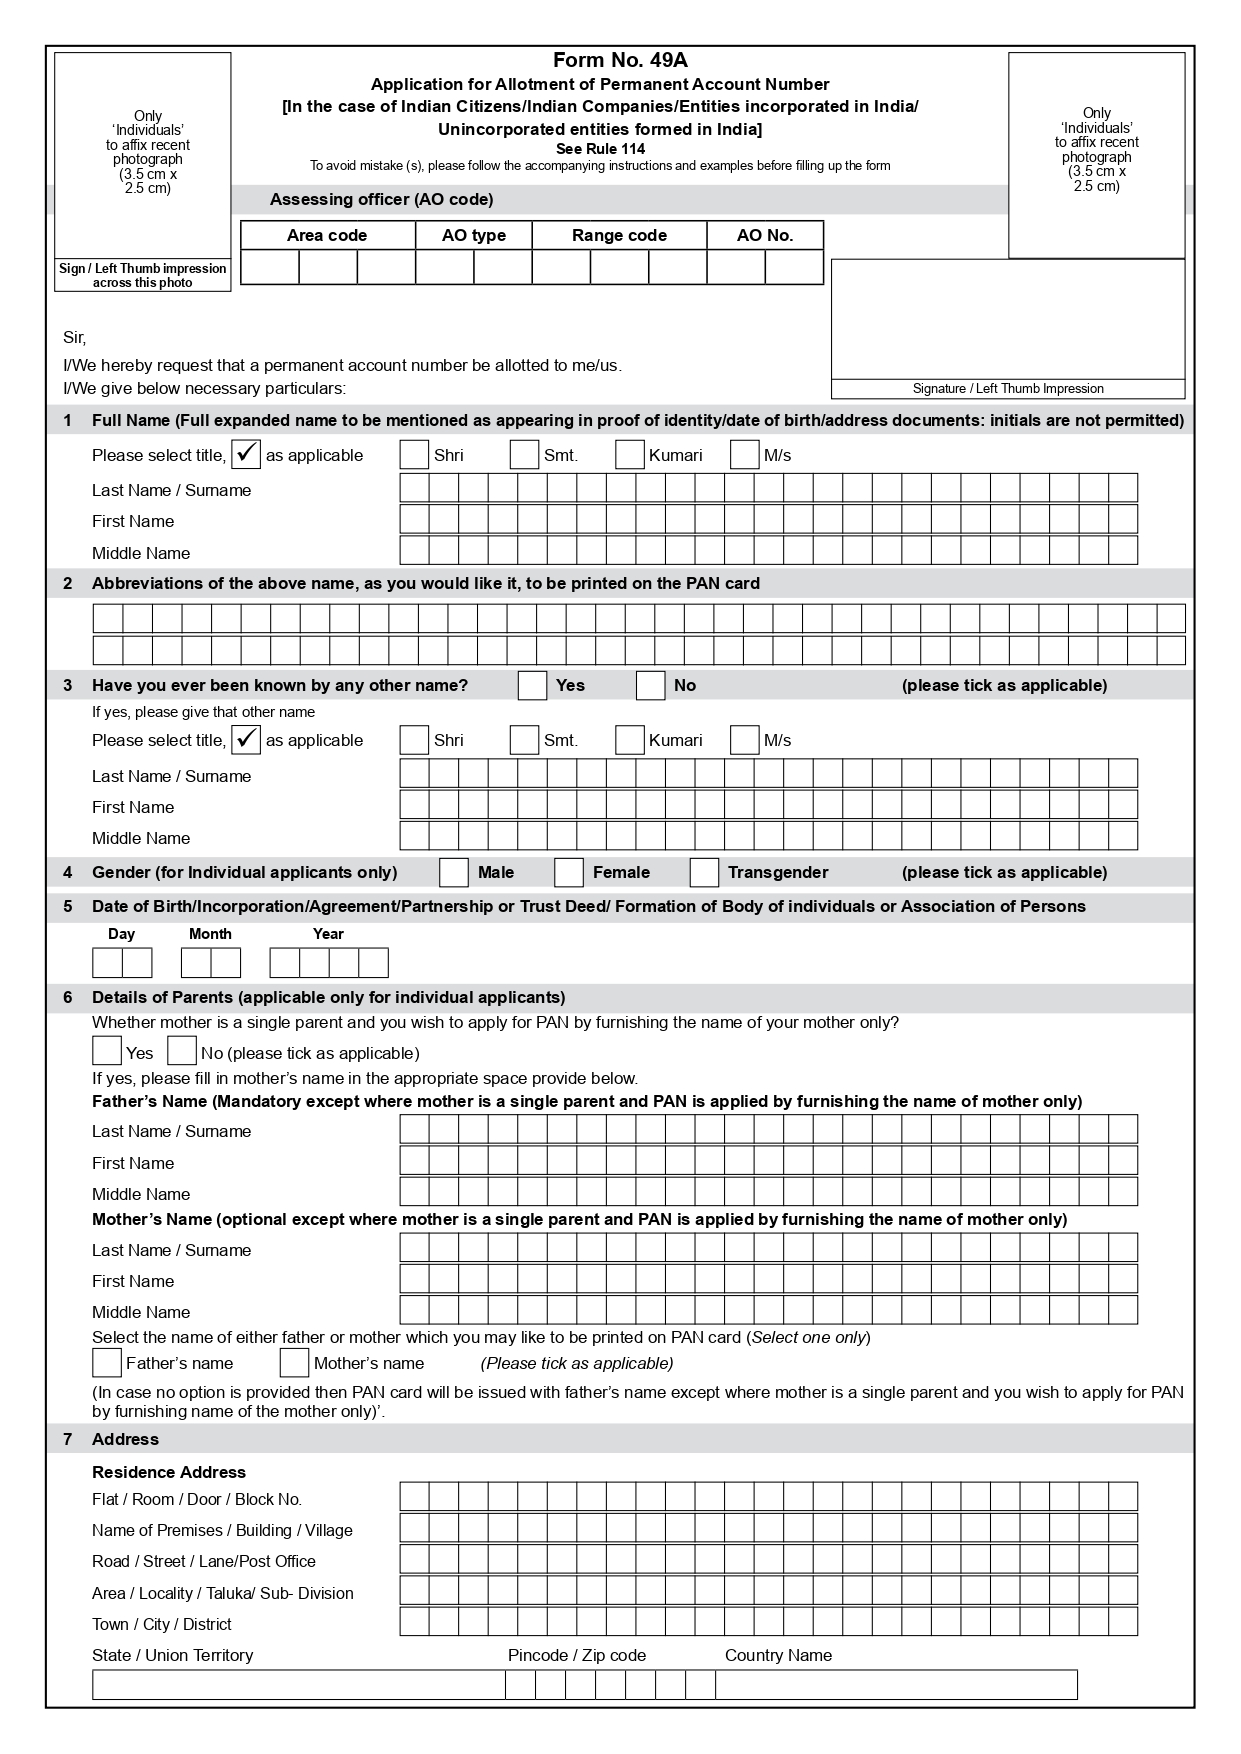

In [3]:
Image("samples/im_1.jpg")

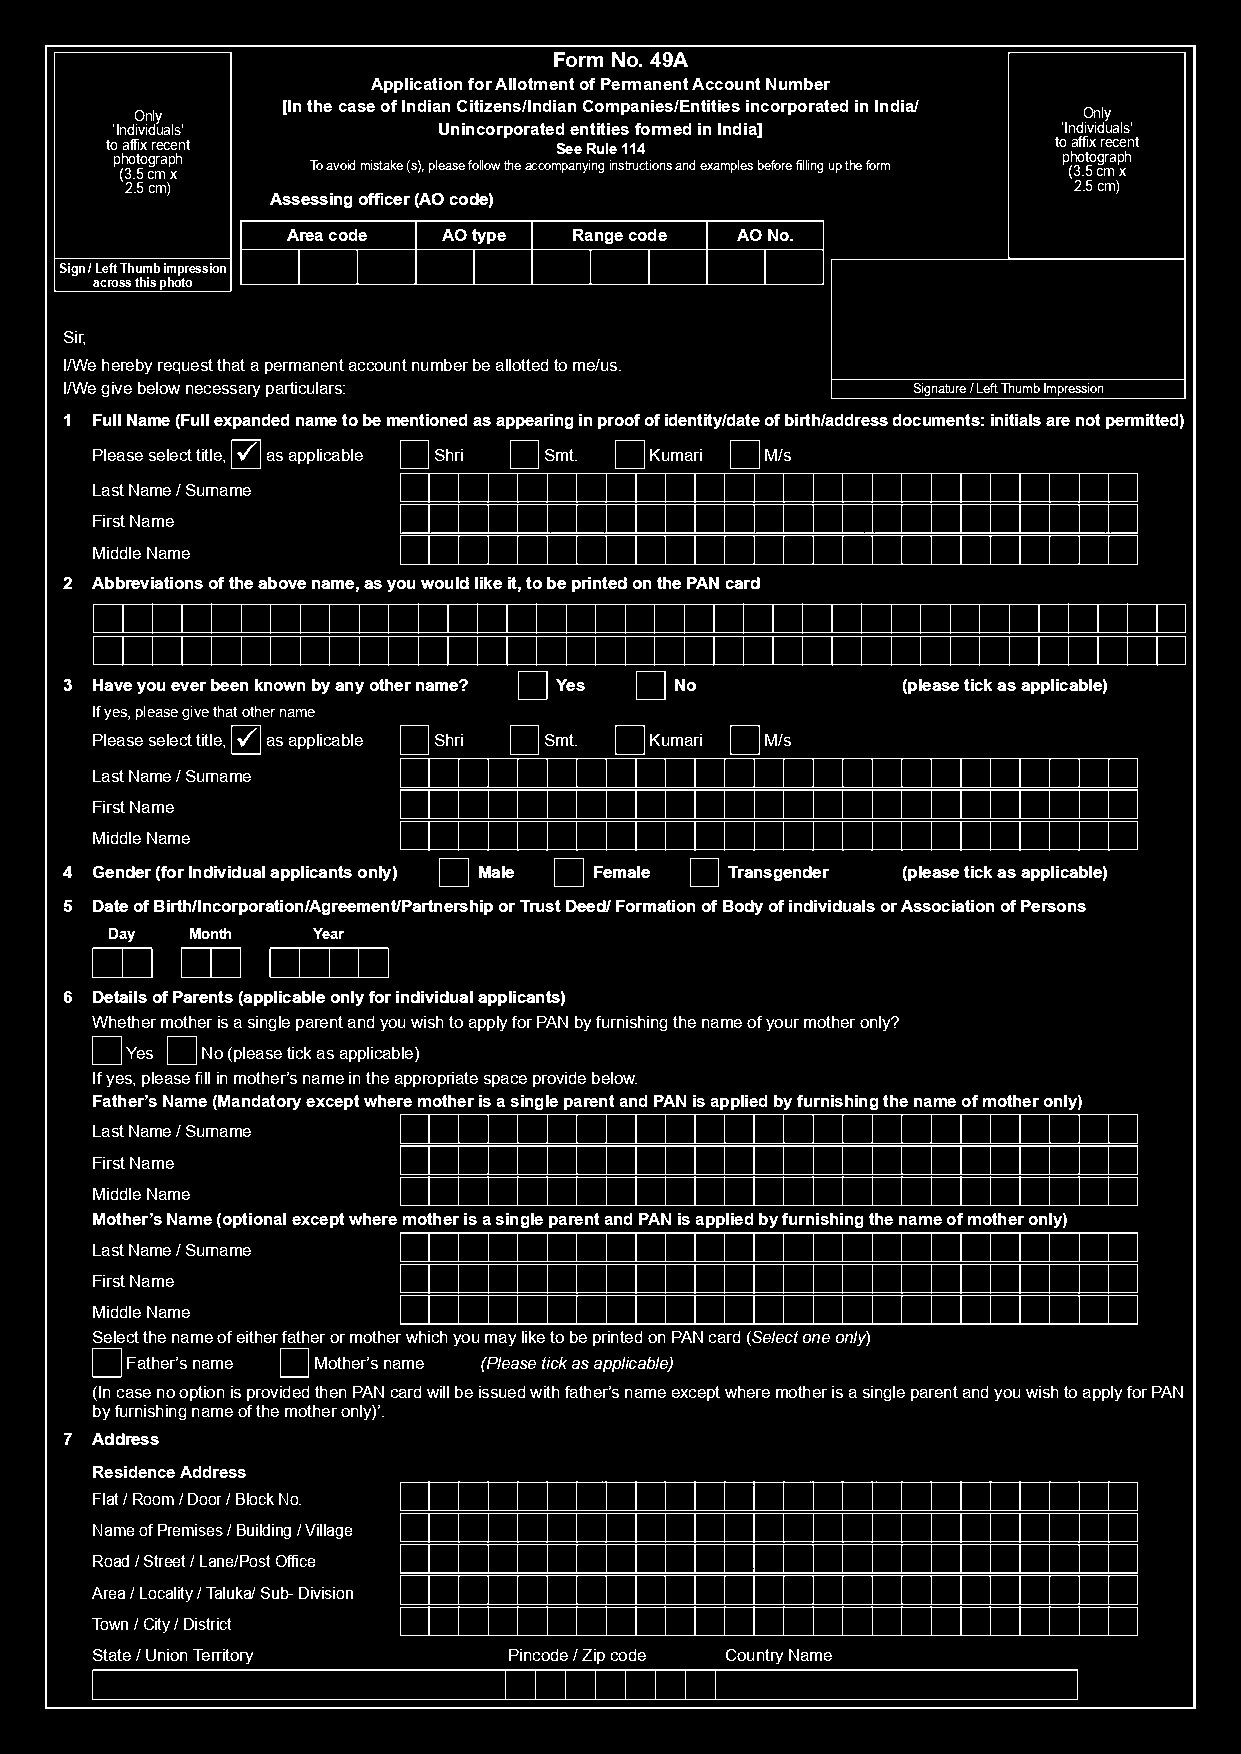

In [4]:
box_dim = 20 # approx minimum box length
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(img.copy(),80,255,cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)[1]
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 2)
rows = int(box_dim)
cols = int(box_dim)
row_mid = int(rows//2)
col_mid = int(cols//2)
cv2.imwrite("thresh.jpg",thresh)
Image("thresh.jpg")

In [5]:
kernel = np.zeros((rows,cols),"uint8")  ## create kernel to detect bottom left corners
kernel[:row_mid,col_mid] = 1
kernel[row_mid,col_mid:] = 1
corners1 = cv2.erode(thresh,kernel,iterations=1)
kernel

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
kernel = np.zeros((rows, cols), "uint8") ## create kernel to detect bottom right corners
kernel[:row_mid, col_mid] = 1
kernel[row_mid, :col_mid] = 1
corners2 = cv2.erode(thresh, kernel, iterations=1)

In [7]:
kernel = np.zeros((rows, cols), "uint8") ## create kernel to detect top left corners
kernel[row_mid:, col_mid] = 1
kernel[row_mid, col_mid:] = 1
corners3 = cv2.erode(thresh, kernel, iterations=1)

In [8]:
kernel = np.zeros((rows, cols), "uint8") ## create kernel to detect top right corners
kernel[row_mid:, col_mid] = 1
kernel[row_mid, :col_mid] = 1
corners4 = cv2.erode(thresh, kernel, iterations=1)

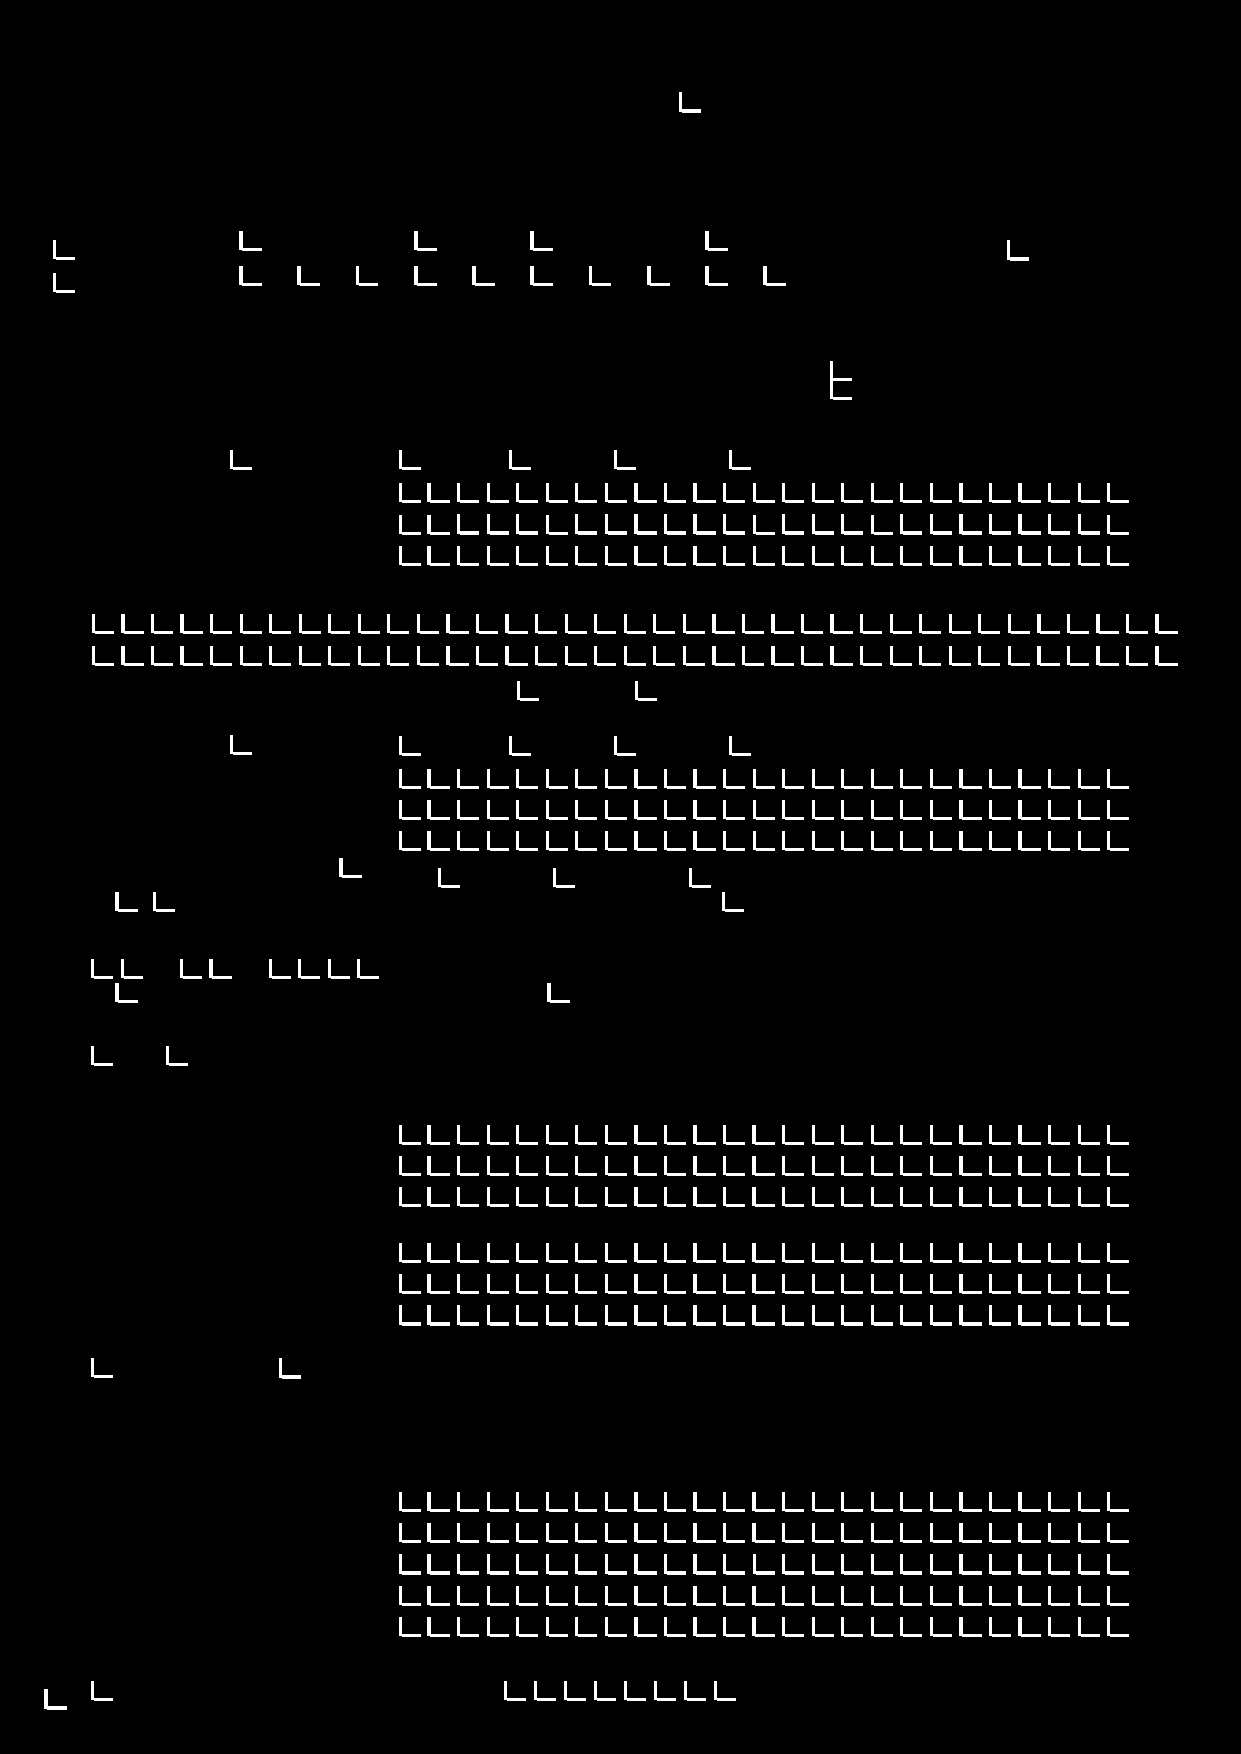

In [9]:
# dilate bottom left
# dilate separately for horizontal and vertical lines
ver_kernel_1 = np.zeros((box_dim, 1),"uint8")
ver_kernel_1[int(box_dim/2):,:] = 1
ver_lines_1 = cv2.dilate(corners1, ver_kernel_1, iterations=2)
hor_kernel_1 = np.ones((1, 3))
ver_lines_1 = cv2.dilate(ver_lines_1, hor_kernel_1, iterations=1)

hor_kernel_1 = np.zeros((1, box_dim),"uint8")
hor_kernel_1[:,:int(box_dim/2)]=1
hor_lines_1 = cv2.dilate(corners1, hor_kernel_1, iterations=2)
ver_kernel_1 = np.ones((3, 1))
hor_lines_1 = cv2.dilate(hor_lines_1, ver_kernel_1, iterations=1)

#combine horizontal and vertical lines 
cv2.imwrite("corner1.jpg",np.bitwise_or(hor_lines_1,ver_lines_1))
Image("corner1.jpg")

In [10]:
# similar treatment for all four corners
# dilate bottom right
ver_kernel_2 = np.zeros((box_dim, 1), "uint8")
ver_kernel_2[int(box_dim / 2):, :] = 1
ver_lines_2 = cv2.dilate(corners2, ver_kernel_2, iterations=2)
hor_kernel_2 = np.ones((1, 3))
ver_lines_2 = cv2.dilate(ver_lines_2, hor_kernel_2, iterations=1)

hor_kernel_2 = np.zeros((1, box_dim), "uint8")
hor_kernel_2[:, int(box_dim / 2):] = 1
hor_lines_2 = cv2.dilate(corners2, hor_kernel_2, iterations=2)
ver_kernel_2 = np.ones((3, 1))
hor_lines_2 = cv2.dilate(hor_lines_2, ver_kernel_2, iterations=1)

In [11]:
# dilate top left
ver_kernel_3 = np.zeros((box_dim, 1), "uint8")
ver_kernel_3[:int(box_dim / 2), :] = 1
ver_lines_3 = cv2.dilate(corners3, ver_kernel_3, iterations=2)
hor_kernel_3 = np.ones((1, 3))
ver_lines_3 = cv2.dilate(ver_lines_3, hor_kernel_3, iterations=1)

hor_kernel_3 = np.zeros((1, box_dim), "uint8")
hor_kernel_3[:, :int(box_dim / 2)] = 1
hor_lines_3 = cv2.dilate(corners3, hor_kernel_3, iterations=2)
ver_kernel_3 = np.ones((3, 1))
hor_lines_3 = cv2.dilate(hor_lines_3, ver_kernel_3, iterations=1)

In [12]:
# dilate top right
ver_kernel_4 = np.zeros((box_dim, 1), "uint8")
ver_kernel_4[:int(box_dim / 2), :] = 1
ver_lines_4 = cv2.dilate(corners4, ver_kernel_4, iterations=2)
hor_kernel_4 = np.ones((1, 3))
ver_lines_4 = cv2.dilate(ver_lines_4, hor_kernel_4, iterations=1)

hor_kernel_4 = np.zeros((1, box_dim), "uint8")
hor_kernel_4[:, int(box_dim / 2):] = 1
hor_lines_4 = cv2.dilate(corners4, hor_kernel_4, iterations=2)
ver_kernel_4 = np.ones((3, 1))
hor_lines_4 = cv2.dilate(hor_lines_4, ver_kernel_4, iterations=1)

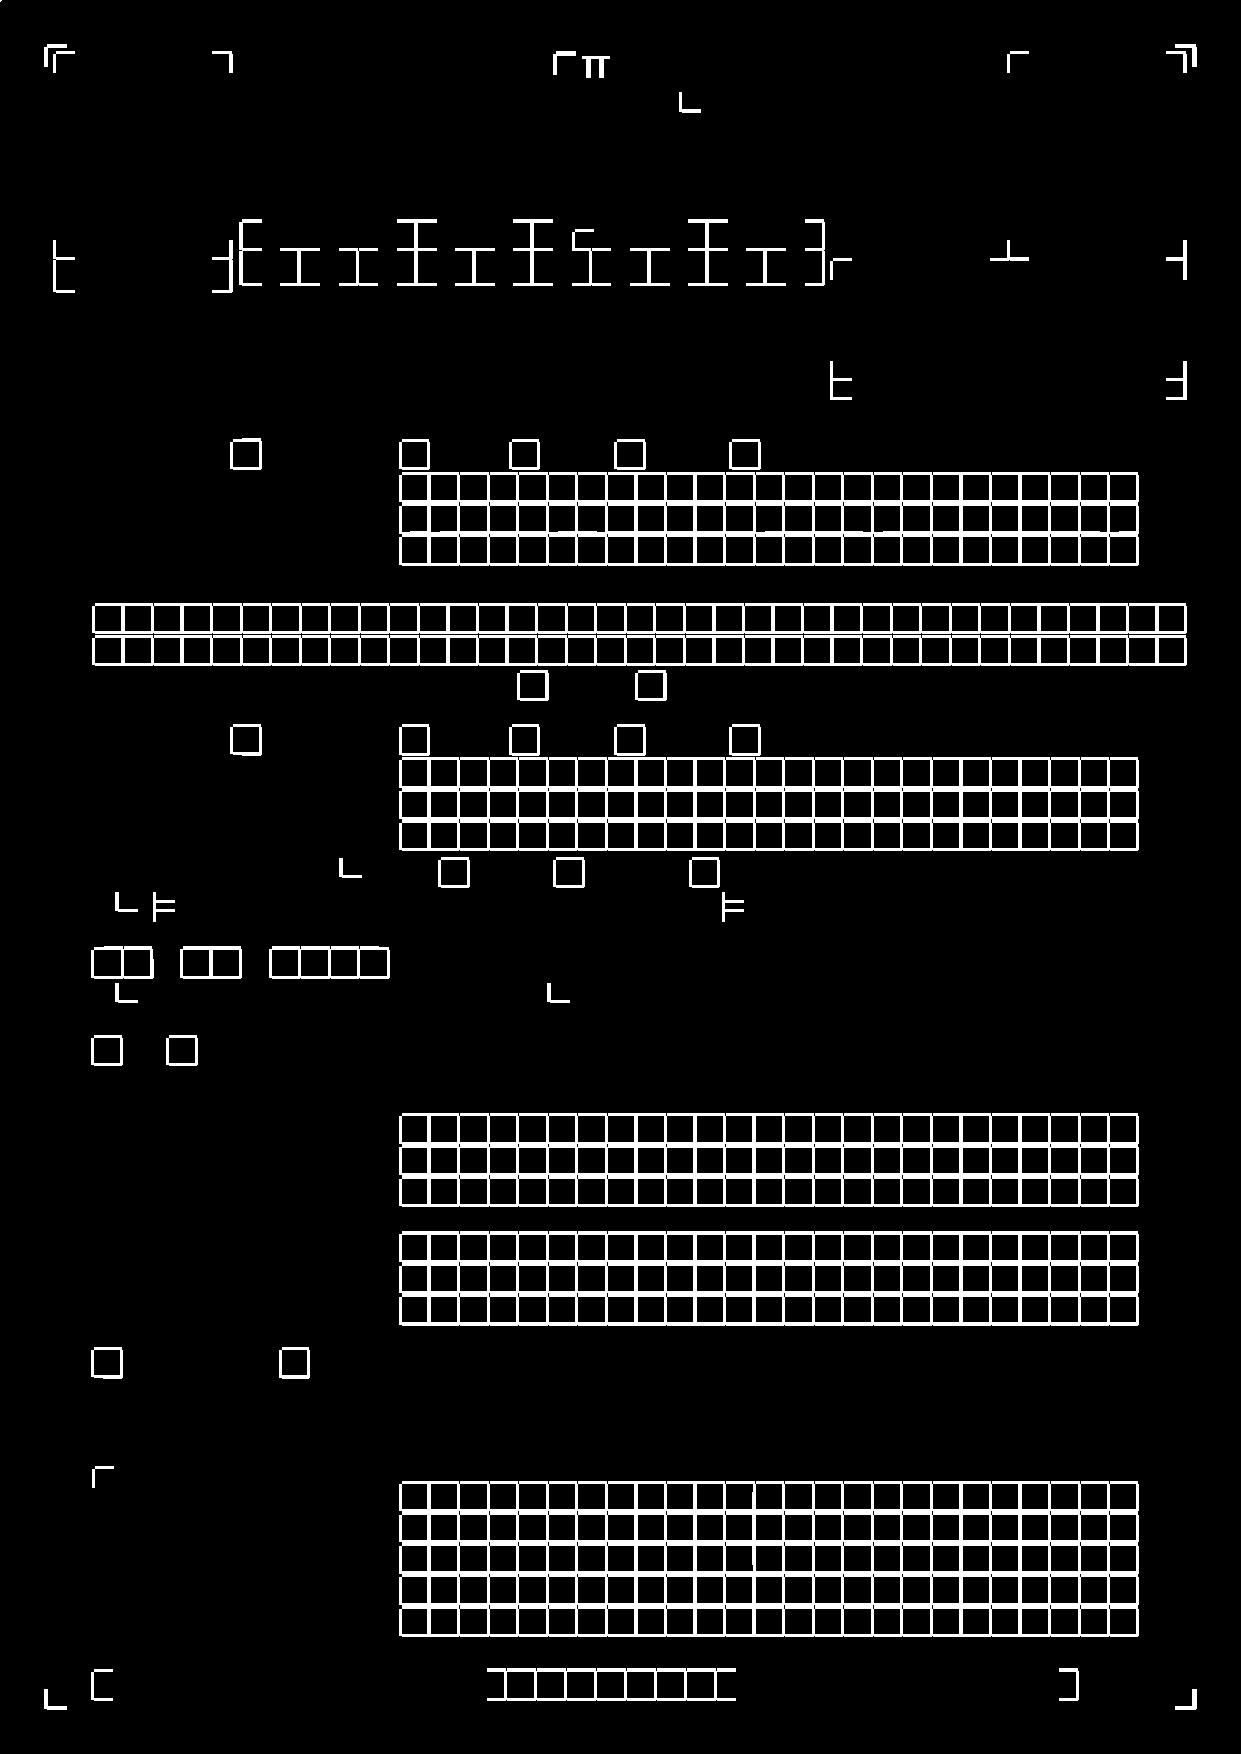

In [13]:
hor_lines_1 = np.bitwise_or(hor_lines_1,hor_lines_2)
hor_lines_2 = np.bitwise_or(hor_lines_3,hor_lines_4)
hor_lines = np.bitwise_or(hor_lines_1,hor_lines_2)

ver_lines_1 = np.bitwise_or(ver_lines_1,ver_lines_2)
ver_lines_2 = np.bitwise_or(ver_lines_3,ver_lines_4)
ver_lines = np.bitwise_or(ver_lines_1,ver_lines_2)

cv2.imwrite("boxes.jpg",np.bitwise_or(ver_lines,hor_lines))
Image("boxes.jpg")

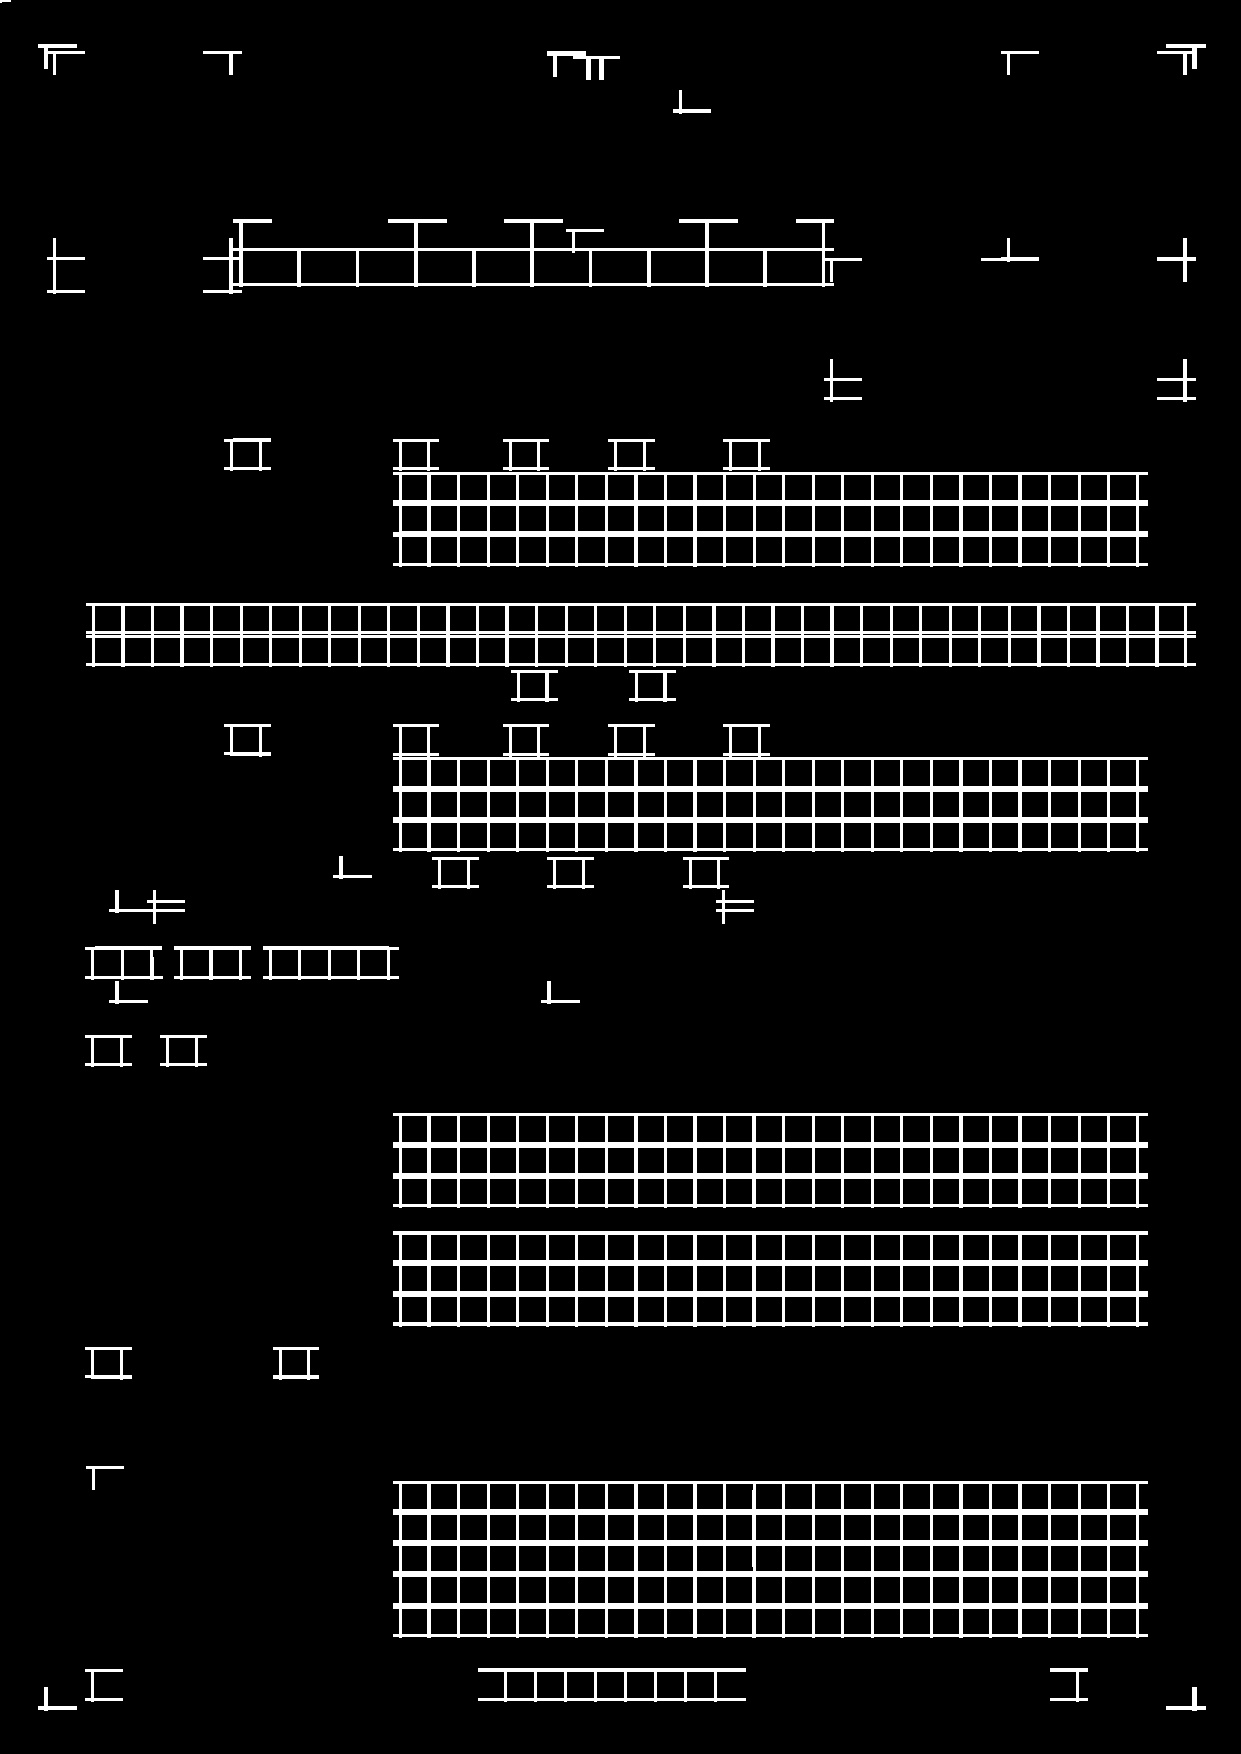

In [14]:
# dilate to close any gaps
ver_kernel = np.ones((5, 1))
hor_kernel = np.ones((1,20))

hor_lines = cv2.dilate(hor_lines, hor_kernel, iterations=1)
ver_lines = cv2.dilate(ver_lines,ver_kernel,iterations=1)

boxes = np.bitwise_or(ver_lines,hor_lines)
cv2.imwrite("boxes.jpg",boxes)
Image("boxes.jpg")

In [15]:
boxes = np.bitwise_not(boxes)
contours_info = cv2.findContours(
            boxes, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours_info[-2]
hierarchy = contours_info[-1]
ChildContour = hierarchy [0, :,2]
WithoutChildContour = (ChildContour==-1).nonzero()[0]

# get contours from indices
contours=[ contours[i] for i in WithoutChildContour]
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])

In [16]:
all_heights = []
all_widths = []

# iterate to get all heights and widths
for i, c in enumerate(contours):
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    all_widths.append(w)
    all_heights.append(h)

heights_counter = Counter(all_heights)
most_common_height = heights_counter.most_common(1)[0][0]
widths_counter = Counter(all_widths)
most_common_width = widths_counter.most_common(1)[0][0]
print("most common height",most_common_height)
print("most common width",most_common_width)


most common height 25
most common width 26


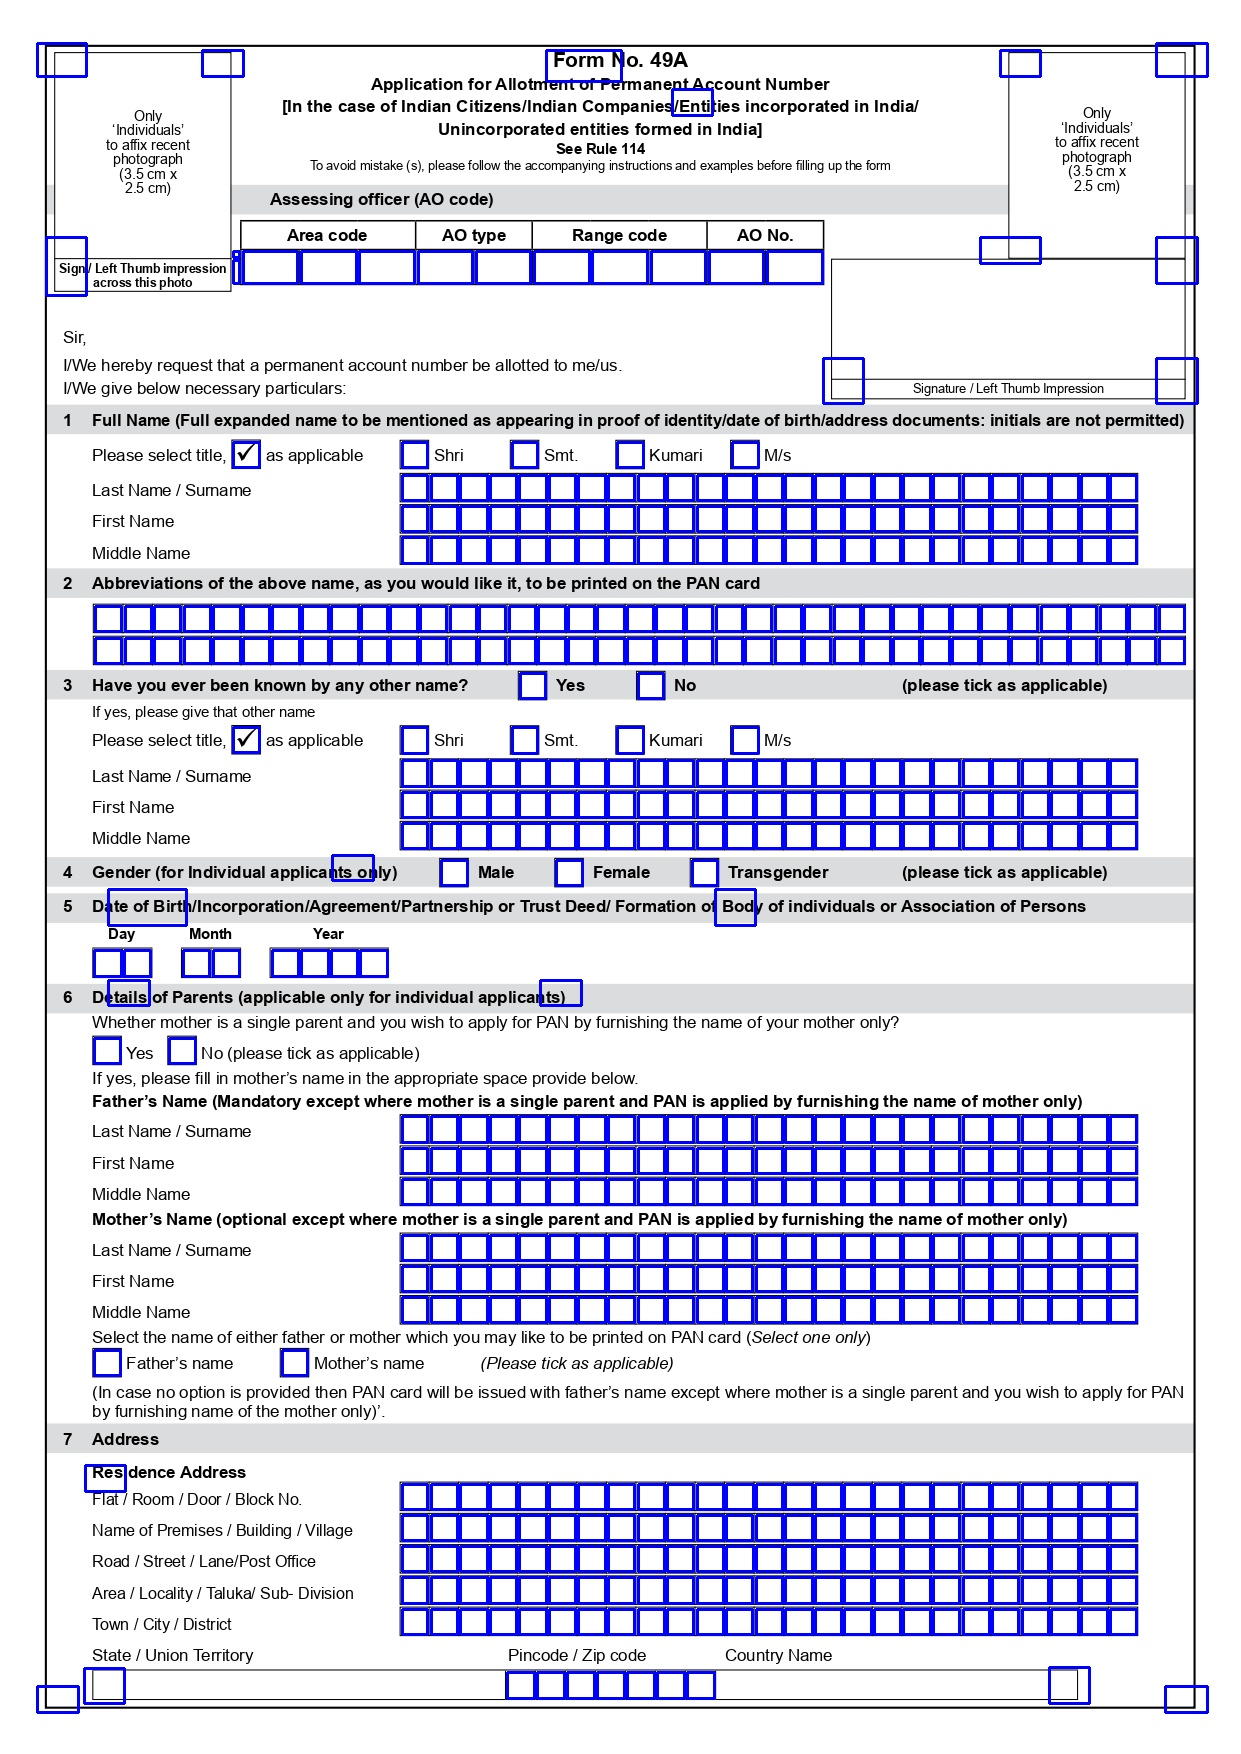

In [17]:
min_width = most_common_width-5
max_width = 3*most_common_width
min_height = most_common_height-5
max_height = 1.5*most_common_height
# remove any noisy contours based onwidth and height
for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    if w > 5 and h > 5 :
        cv2.rectangle(im_out, (x, y), (x + w, y + h), (255,0,0), 2)
cv2.imwrite( "res.jpg" , im_out )
Image("res.jpg")